Loan Classification 
=================


Dream Housing Finance company deals in all kinds of home loans. They have presence across all 
urban, semi urban and rural areas. Customer first applies for home loan and after that company 
validates the customer eligibility for loan.
Company wants to automate the loan eligibility process (real time) based on customer detail 
provided while filling online application form. These details are Gender, Marital Status, Education, 
Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, 
they have provided a dataset to identify the customers segments that are eligible for loan amount so 
that they can specifically target these customers.

* __Category__: #Bagging and Boosting Algorithms  
* __Dataset__: Loan Prediction Dataset  

Dataset Desciption:
----------------------------
> __Loan_ID__: *Unique Loan ID*  
> __Gender__: *Male/ Female*  
> __Married__: *Applicant married (Y/N)*  
> __Dependents__: *Number of dependents*  
> __Education__: *Applicant Education (Graduate/ Under Graduate)*  
> __Self_Employed__: *Self employed (Y/N)*  
> __ApplicantIncome__: *Applicant income*  
> __CoapplicantIncome__:  *Coapplicant income*  
> __LoanAmount__: *Loan amount in thousandse*  
> __Loan_Amount_Term__: *Term of loan in months*  
> __Credit_History__: *credit history meets guidelines*  
> __Property_Area__: *credit history meets guidelines*  
> __Loan_Status__: *(Target) Loan approved (Y/N)*  


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")


pd.options.display.max_columns = 1000
pd.options.display.max_rows = 10000
pd.options.display.max_colwidth = -1

In [10]:
data=pd.read_csv("loan_prediction.csv")
df=data.copy()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df.isnull().sum()

Loan_ID              0 
Gender               13
Married              3 
Dependents           15
Education            0 
Self_Employed        32
ApplicantIncome      0 
CoapplicantIncome    0 
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area        0 
Loan_Status          0 
dtype: int64

In [5]:
unique_columns = []
for col in df.select_dtypes(include=["float","int"]).columns:
    if(df[col].nunique() < 20):
        unique_columns = unique_columns+[col]

In [6]:
unique_columns

['Loan_Amount_Term', 'Credit_History']

In [7]:
df[unique_columns]=df[unique_columns].astype(object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df["Loan_Status"]=lb.fit_transform(df["Loan_Status"])
df["Loan_Status"].value_counts()

# Yes == 1 
# No == 0

1    422
0    192
Name: Loan_Status, dtype: int64

### Data Transformation 

In [577]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [578]:
df.drop("Loan_ID",axis=1,inplace=True)

In [579]:
for col in df.select_dtypes(include=['object']).columns:
    print(col.upper(),":",df[col].unique(),"\n")

GENDER : ['Male' 'Female' nan] 

MARRIED : ['No' 'Yes' nan] 

DEPENDENTS : ['0' '1' '2' '3+' nan] 

EDUCATION : ['Graduate' 'Not Graduate'] 

SELF_EMPLOYED : ['No' 'Yes' nan] 

LOAN_AMOUNT_TERM : [360.0 120.0 240.0 nan 180.0 60.0 300.0 480.0 36.0 84.0 12.0] 

CREDIT_HISTORY : [1.0 0.0 nan] 

PROPERTY_AREA : ['Urban' 'Rural' 'Semiurban'] 



In [580]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0    44 
480.0    15 
300.0    13 
84.0     4  
240.0    4  
120.0    3  
36.0     2  
60.0     2  
12.0     1  
Name: Loan_Amount_Term, dtype: int64

In [581]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+    51 
Name: Dependents, dtype: int64

In [582]:
df.Credit_History.value_counts()

1.0    475
0.0    89 
Name: Credit_History, dtype: int64

In [583]:
df.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
128.0    11
113.0    11
130.0    10
95.0     9 
96.0     9 
115.0    8 
70.0     8 
112.0    8 
132.0    7 
125.0    7 
150.0    7 
135.0    7 
104.0    7 
136.0    7 
180.0    6 
116.0    6 
155.0    6 
81.0     6 
80.0     6 
144.0    6 
175.0    6 
138.0    6 
90.0     6 
158.0    6 
111.0    5 
71.0     5 
185.0    5 
200.0    5 
133.0    5 
108.0    5 
152.0    5 
140.0    5 
124.0    5 
99.0     4 
50.0     4 
98.0     4 
172.0    4 
66.0     4 
123.0    4 
105.0    4 
137.0    4 
134.0    4 
131.0    4 
60.0     4 
84.0     4 
88.0     4 
55.0     4 
126.0    4 
182.0    4 
94.0     4 
122.0    4 
151.0    4 
225.0    3 
170.0    3 
165.0    3 
188.0    3 
173.0    3 
93.0     3 
127.0    3 
162.0    3 
103.0    3 
67.0     3 
480.0    3 
107.0    3 
75.0     3 
260.0    3 
74.0     3 
118.0    3 
168.0    3 
275.0    3 
255.0    3 
102.0    3 
210.0    2 
139.0    2 
154.0    2 
216.0    2 
44.0     2 
258.0    2 
192.

### Imputing Missing Values

In [584]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[["Gender","Married","Self_Employed","Loan_Amount_Term"]]=imp.fit_transform(df[["Gender","Married","Self_Employed","Loan_Amount_Term"]])

In [585]:
df.isnull().sum()

Gender               0 
Married              0 
Dependents           15
Education            0 
Self_Employed        0 
ApplicantIncome      0 
CoapplicantIncome    0 
LoanAmount           22
Loan_Amount_Term     0 
Credit_History       50
Property_Area        0 
Loan_Status          0 
dtype: int64

In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     564 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int32  
dtypes: float64(3), int32(1), int64(1), object(7)
memory usage: 55.3+ KB


In [588]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


In [590]:
# df.Credit_History=df.Credit_History.astype(object)
# df.Loan_Amount_Term=df.Loan_Amount_Term.astype(object)
# df.LoanAmount=df.LoanAmount.astype(object)

In [591]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,146.416938,84.917398,9.0,100.0,128.0,166.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.0,360.0,360.00,480.0
Credit_History,614.0,0.842020,0.365020,0.0,1.0,1.0,1.00,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


In [592]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


### Visualization

In [593]:
numeric_columns=df.select_dtypes(exclude=["object"])

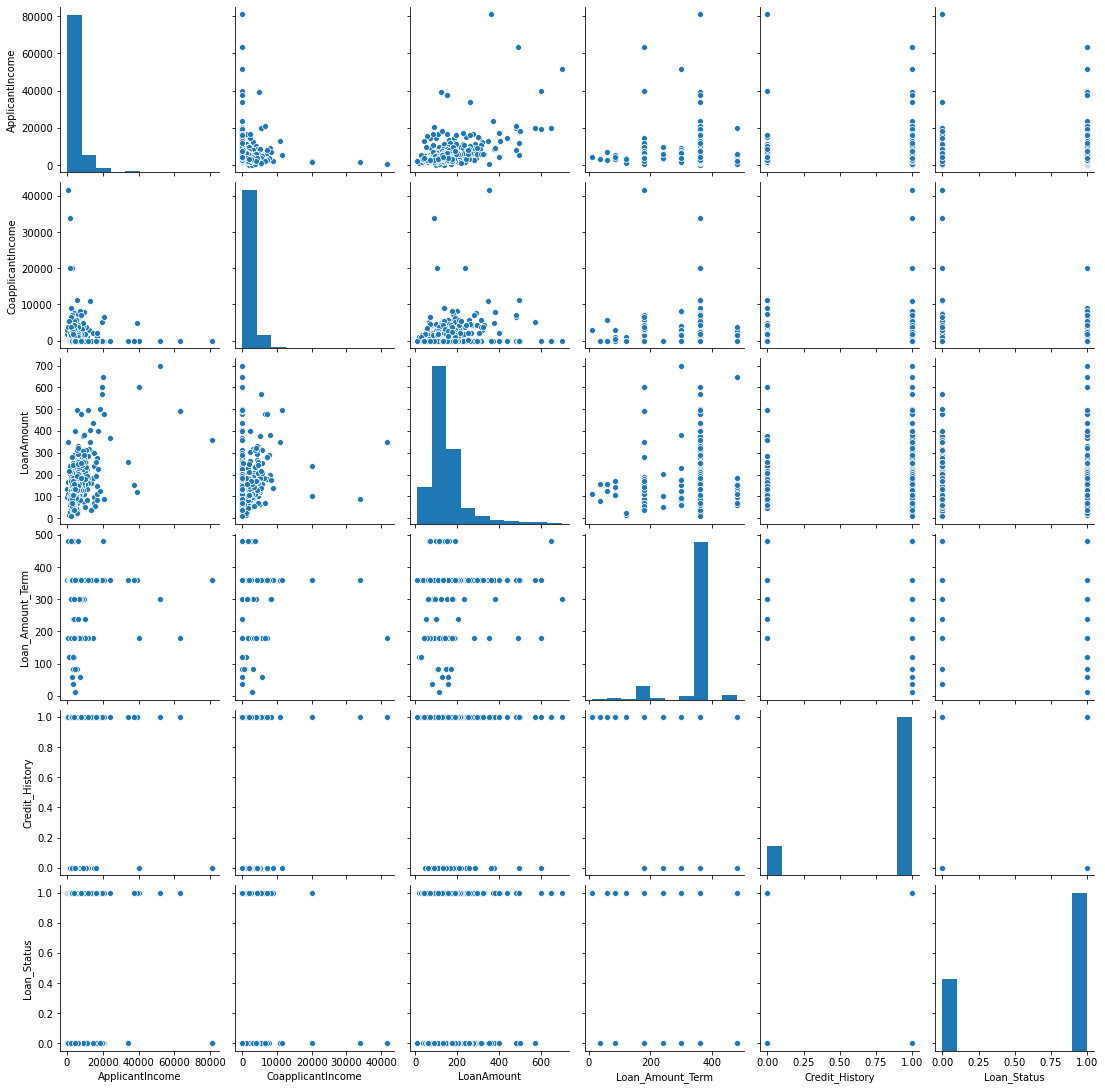

In [594]:
sns.pairplot(df,vars=list(numeric_columns))

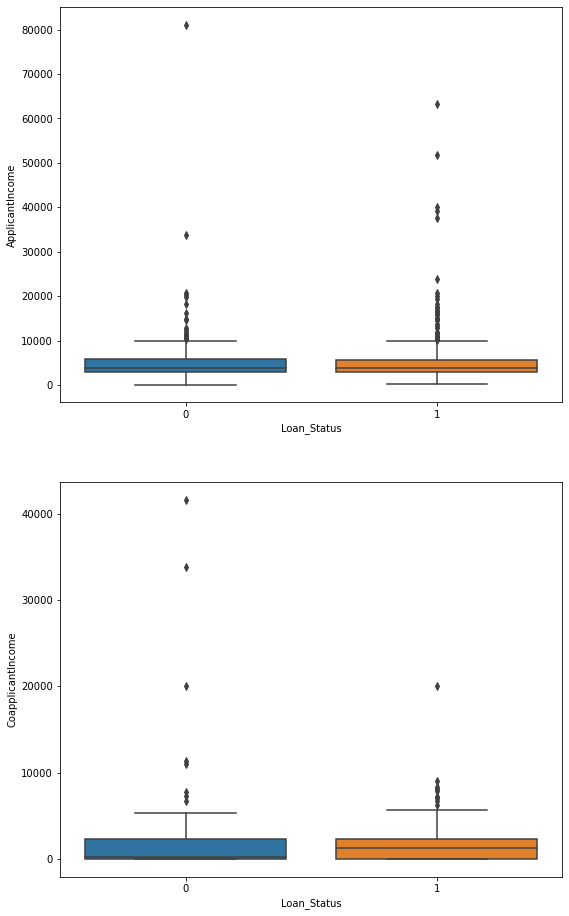

In [595]:
columns_name=['ApplicantIncome', 'CoapplicantIncome']
fig, axes = plt.subplots(nrows=len(columns_name), figsize=(9, 16))
for i in range(len(columns_name)):
   
    sns.boxplot(ax=axes[i],x="Loan_Status", y=columns_name[i], data=df)

<AxesSubplot:>

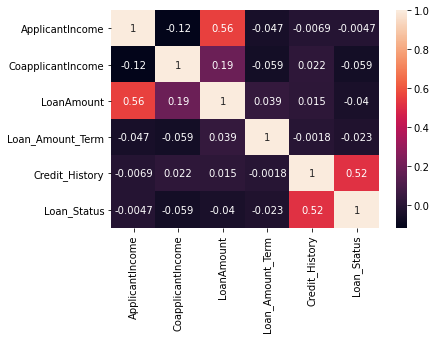

In [596]:
sns.heatmap(df.corr(),annot=True)

### Outliers Cleaning 

In [597]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [598]:
for col in columns_name:
    lowerbound,upperbound = outlier_treatment(df[col])
    if df[col][(df.Loan_Status==1) & (df[col] < lowerbound)].size>0:
        df[col][(df.Loan_Status==1) & (df[col] < lowerbound)]=lowerbound
    if df[col][(df.Loan_Status==0) & (df[col] < lowerbound)].size>0:
        df[col][(df.Loan_Status==0) & (df[col] < lowerbound)]=lowerbound
    if df[col][(df.Loan_Status==1) & (df[col] > upperbound)].size>0:
        df[col][(df.Loan_Status==1) & (df[col] > upperbound)]=upperbound
    if df[col][(df.Loan_Status==0) & (df[col] > upperbound)].size>0:
        df[col][(df.Loan_Status==0) & (df[col] > upperbound)]=upperbound

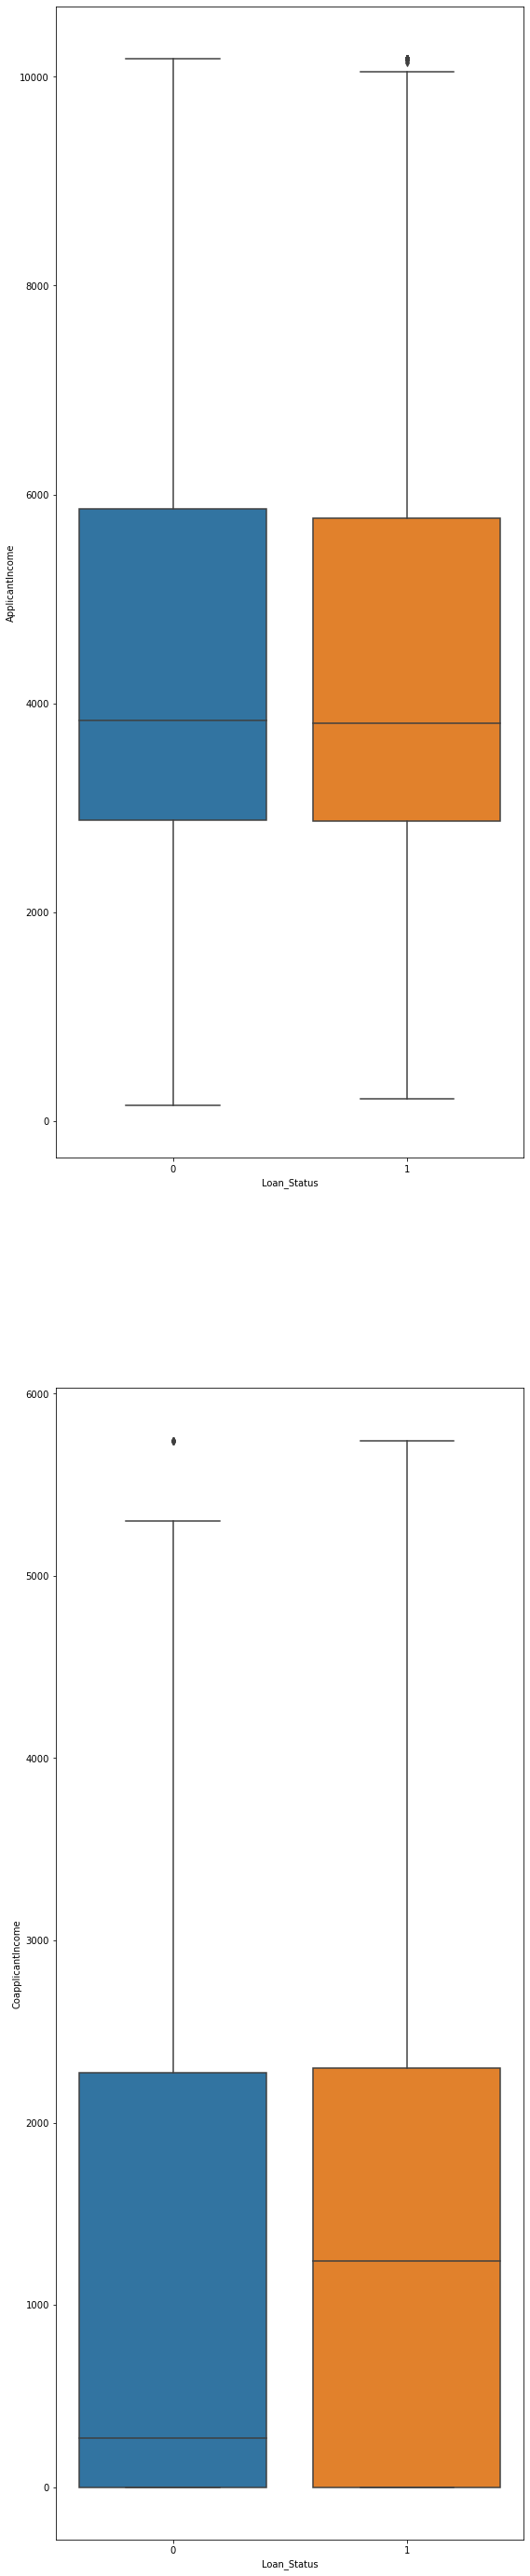

In [599]:
columns_name=['ApplicantIncome', 'CoapplicantIncome']
fig, axes = plt.subplots(nrows=len(columns_name), figsize=(9, 50))
for i in range(len(columns_name)):
   
    sns.boxplot(ax=axes[i],x="Loan_Status", y=columns_name[i], data=df)

<AxesSubplot:>

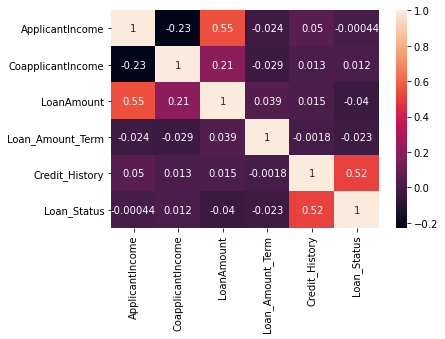

In [600]:
sns.heatmap(df.corr(),annot=True)

In [601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int32  
dtypes: float64(5), int32(1), object(6)
memory usage: 55.3+ KB


### One Hot Encoding  

In [602]:
dms_df=df.select_dtypes(include=['object'])
dms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         614 non-null    object
 1   Married        614 non-null    object
 2   Dependents     614 non-null    object
 3   Education      614 non-null    object
 4   Self_Employed  614 non-null    object
 5   Property_Area  614 non-null    object
dtypes: object(6)
memory usage: 28.9+ KB


In [603]:

dms_df=pd.get_dummies(dms_df,drop_first=True)
df_=df.drop(df.select_dtypes(include=['object']).columns,axis=1)

df=pd.concat([df_,dms_df],axis=1)

In [604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    float64
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Loan_Status              614 non-null    int32  
 6   Gender_Male              614 non-null    uint8  
 7   Married_Yes              614 non-null    uint8  
 8   Dependents_1             614 non-null    uint8  
 9   Dependents_2             614 non-null    uint8  
 10  Dependents_3+            614 non-null    uint8  
 11  Education_Not Graduate   614 non-null    uint8  
 12  Self_Employed_Yes        614 non-null    uint8  
 13  Property_Area_Semiurban  614 non-null    uint8  
 14  Property_Area_Urban      6

In [605]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,128.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,4583.0,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,2583.0,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,6000.0,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1


### Imbalanced Check  

In [606]:
df_final=df.copy()

In [607]:
# Imbalanced check 
df_final['Loan_Status'].sum()/len(df_final)

0.6872964169381107

### Train Test Split 

##### ImBalanced DataFrame

In [608]:
from sklearn.model_selection import train_test_split
y=df_final.Loan_Status
X=df_final.drop("Loan_Status",axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.23,random_state=42)

In [609]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((472, 14), (142, 14), (472,), (142,))

### Scaling 

In [610]:
from sklearn.preprocessing import RobustScaler
rc=RobustScaler().fit(X_train)
X_train_scaled=rc.transform(X_train)
X_test_scaled=rc.transform(X_test)

In [611]:
X_train_scaled.shape,X_test_scaled.shape,y_train.shape,y_test.shape

((472, 14), (142, 14), (472,), (142,))

### Modeling 

### Voting Soft

In [612]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

model1=LogisticRegression()
model2=KNeighborsClassifier()
model3=GaussianNB()

estimators = [('LogisticRegression', model1), ('KNN', model2) , ('NaiveBayes', model3) ] 

model = VotingClassifier(estimators, voting="soft",weights=[0.2,0.3,0.5])
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.7816901408450704

In [613]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score,f1_score
cm=confusion_matrix(y_test,model.predict(X_test_scaled))
print("Confusion Matrix\n\n",cm)

accuracy = accuracy_score(y_test, model.predict(X_test_scaled)) 
precision = precision_score(y_test, model.predict(X_test_scaled)) 
recall = recall_score(y_test, model.predict(X_test_scaled)) 
f1 = f1_score(y_test, model.predict(X_test_scaled))

print("\nAccuracy score:",accuracy,
      "\nPrecision score:",precision,
      "\nRecall score:",recall,
      "\nF1 score:",f1)

Confusion Matrix

 [[21 28]
 [ 3 90]]

Accuracy score: 0.7816901408450704 
Precision score: 0.7627118644067796 
Recall score: 0.967741935483871 
F1 score: 0.8530805687203792


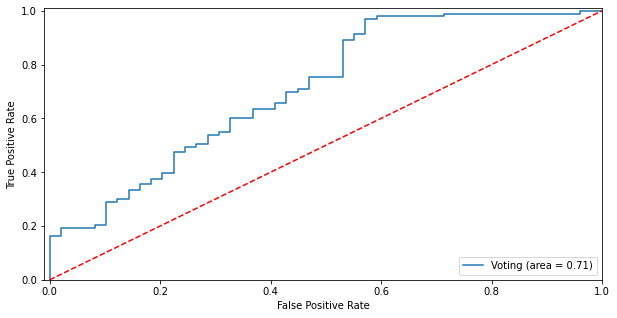

In [615]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

result = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Voting (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Bagging Classifier

In [620]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=42))
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled,y_test)

0.7535211267605634

In [621]:
cm=confusion_matrix(y_test,model.predict(X_test_scaled))
print("Confusion Matrix\n\n",cm)

accuracy = accuracy_score(y_test, model.predict(X_test_scaled)) 
precision = precision_score(y_test, model.predict(X_test_scaled)) 
recall = recall_score(y_test, model.predict(X_test_scaled)) 
f1 = f1_score(y_test, model.predict(X_test_scaled))

print("\nAccuracy score:",accuracy,
      "\nPrecision score:",precision,
      "\nRecall score:",recall,
      "\nF1 score:",f1)

Confusion Matrix

 [[24 25]
 [10 83]]

Accuracy score: 0.7535211267605634 
Precision score: 0.7685185185185185 
Recall score: 0.8924731182795699 
F1 score: 0.8258706467661692


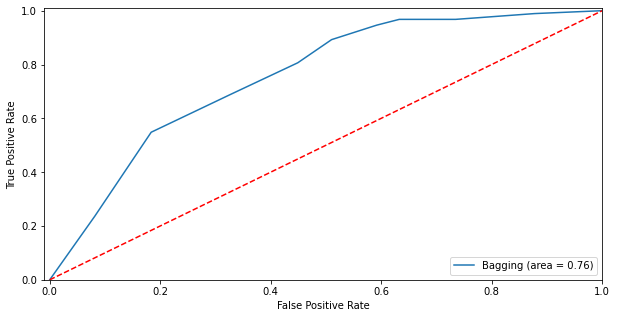

In [622]:
result = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Bagging (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Gradient Boosting Classifier

In [623]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled,y_test)

0.7535211267605634

In [624]:
cm=confusion_matrix(y_test,model.predict(X_test_scaled))
print("Confusion Matrix\n\n",cm)

accuracy = accuracy_score(y_test, model.predict(X_test_scaled)) 
precision = precision_score(y_test, model.predict(X_test_scaled)) 
recall = recall_score(y_test, model.predict(X_test_scaled)) 
f1 = f1_score(y_test, model.predict(X_test_scaled))

print("\nAccuracy score:",accuracy,
      "\nPrecision score:",precision,
      "\nRecall score:",recall,
      "\nF1 score:",f1)

Confusion Matrix

 [[17 32]
 [ 3 90]]

Accuracy score: 0.7535211267605634 
Precision score: 0.7377049180327869 
Recall score: 0.967741935483871 
F1 score: 0.8372093023255814


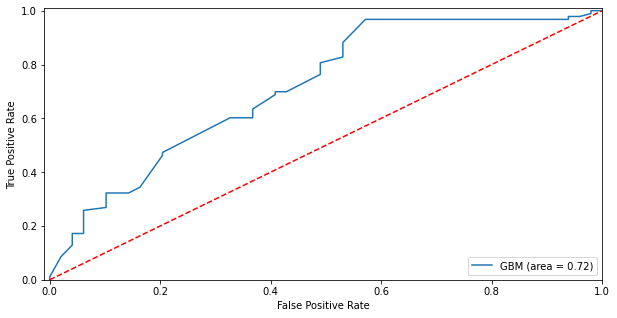

In [625]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

result = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='GBM (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

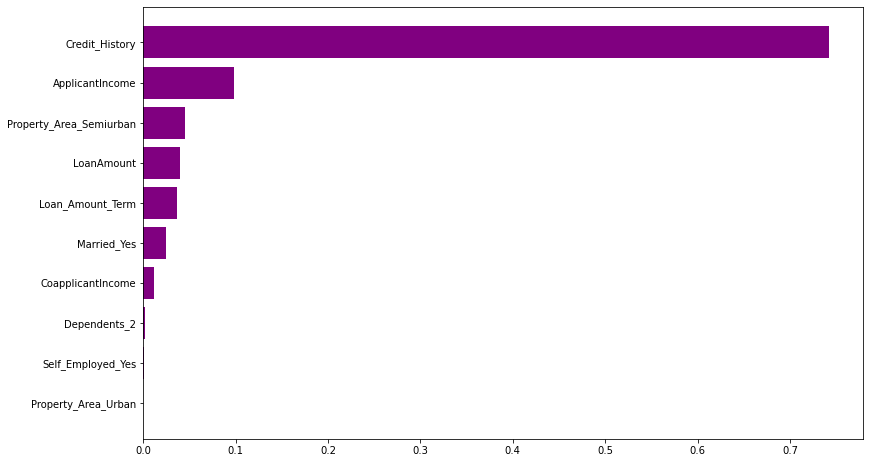

In [626]:
Importance=pd.DataFrame({
    "Features":model.feature_importances_
},index=X_train.columns)
data=Importance.sort_values(by="Features",axis=0,ascending=True)
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.barh(data.index[-10:],data.Features[-10:],color="purple")
plt.show()

### XGBoost Classifier

In [630]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train_scaled, y_train,eval_metric=['auc'],verbose=True)
model.score(X_test_scaled,y_test)

0.7676056338028169

In [631]:
cm=confusion_matrix(y_test,model.predict(X_test_scaled))
print("Confusion Matrix\n\n",cm)

accuracy = accuracy_score(y_test, model.predict(X_test_scaled)) 
precision = precision_score(y_test, model.predict(X_test_scaled)) 
recall = recall_score(y_test, model.predict(X_test_scaled)) 
f1 = f1_score(y_test, model.predict(X_test_scaled))

print("\nAccuracy score:",accuracy,
      "\nPrecision score:",precision,
      "\nRecall score:",recall,
      "\nF1 score:",f1)

Confusion Matrix

 [[21 28]
 [ 5 88]]

Accuracy score: 0.7676056338028169 
Precision score: 0.7586206896551724 
Recall score: 0.946236559139785 
F1 score: 0.8421052631578947


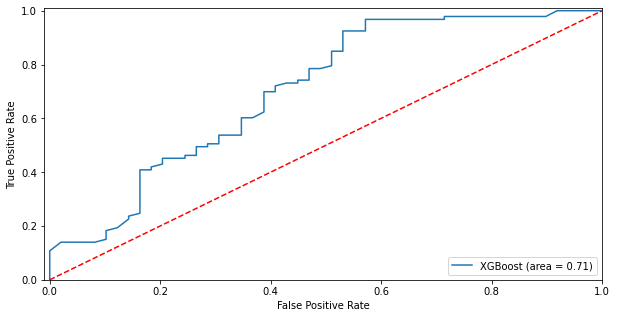

In [632]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

result = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

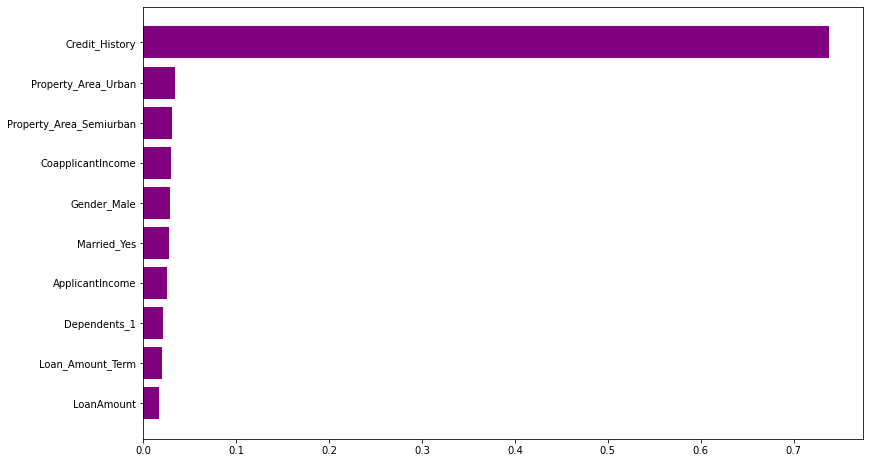

In [633]:
Importance=pd.DataFrame({
    "Features":model.feature_importances_
},index=X_train.columns)
data=Importance.sort_values(by="Features",axis=0,ascending=True)
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.barh(data.index[-10:],data.Features[-10:],color="purple")
plt.show()


### Cat Boost Classifier

In [634]:
from catboost import CatBoostClassifier
model=CatBoostClassifier()
model.fit(X_train_scaled, y_train,eval_set=(X_test_scaled, y_test),verbose=False,)
model.score(X_test_scaled,y_test)

0.7816901408450704

In [635]:
cm=confusion_matrix(y_test,model.predict(X_test_scaled))
print("Confusion Matrix\n\n",cm)

accuracy = accuracy_score(y_test, model.predict(X_test_scaled)) 
precision = precision_score(y_test, model.predict(X_test_scaled)) 
recall = recall_score(y_test, model.predict(X_test_scaled)) 
f1 = f1_score(y_test, model.predict(X_test_scaled))

print("\nAccuracy score:",accuracy,
      "\nPrecision score:",precision,
      "\nRecall score:",recall,
      "\nF1 score:",f1)

Confusion Matrix

 [[21 28]
 [ 3 90]]

Accuracy score: 0.7816901408450704 
Precision score: 0.7627118644067796 
Recall score: 0.967741935483871 
F1 score: 0.8530805687203792


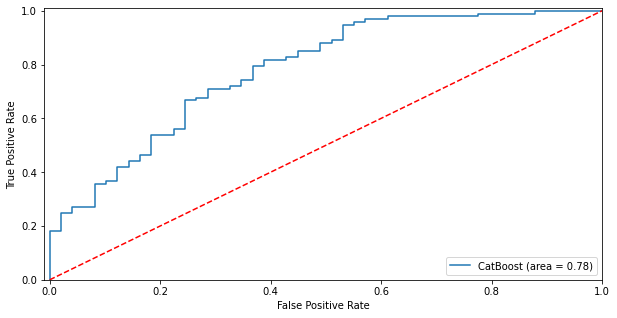

In [636]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

result = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='CatBoost (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

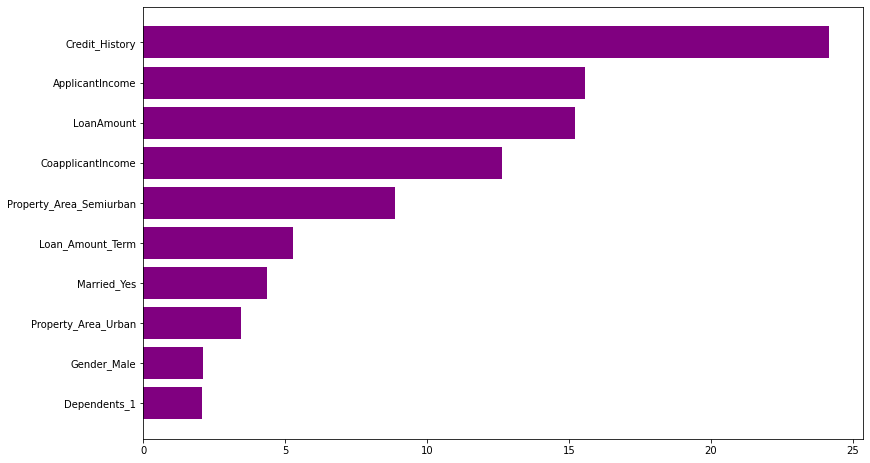

In [637]:
Importance=pd.DataFrame({
    "Features":model.feature_importances_
},index=X_train.columns)
data=Importance.sort_values(by="Features",axis=0,ascending=True)
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.barh(data.index[-10:],data.Features[-10:],color="purple")
plt.show()


### LightGBM Classifier

In [638]:
from lightgbm import LGBMClassifier
model=LGBMClassifier(boosting_type="goss")
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled,y_test)

0.7605633802816901

In [639]:
cm=confusion_matrix(y_test,model.predict(X_test_scaled))
print("Confusion Matrix\n\n",cm)

accuracy = accuracy_score(y_test, model.predict(X_test_scaled)) 
precision = precision_score(y_test, model.predict(X_test_scaled)) 
recall = recall_score(y_test, model.predict(X_test_scaled)) 
f1 = f1_score(y_test, model.predict(X_test_scaled))

print("\nAccuracy score:",accuracy,
      "\nPrecision score:",precision,
      "\nRecall score:",recall,
      "\nF1 score:",f1)

Confusion Matrix

 [[22 27]
 [ 7 86]]

Accuracy score: 0.7605633802816901 
Precision score: 0.7610619469026548 
Recall score: 0.9247311827956989 
F1 score: 0.8349514563106796


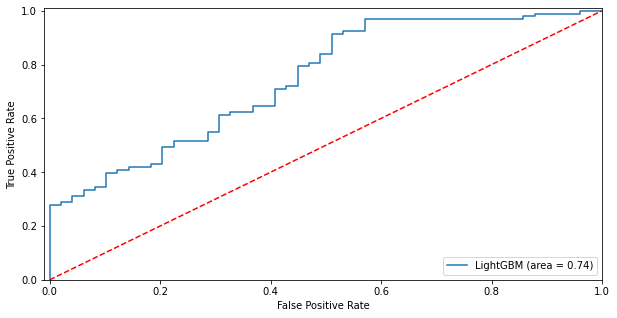

In [640]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

result = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='LightGBM (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

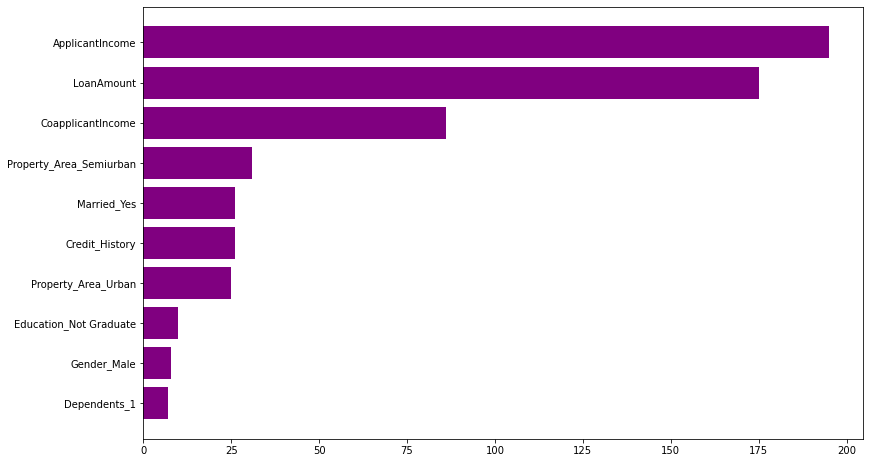

In [641]:
Importance=pd.DataFrame({
    "Features":model.feature_importances_
},index=X_train.columns)
data=Importance.sort_values(by="Features",axis=0,ascending=True)
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.barh(data.index[-10:],data.Features[-10:],color="purple")
plt.show()
